# MLP Music Genre Classification (main3)

Improved version that leverages precomputed features from CSV (e.g., `data/Data/features_30_sec.csv`) for faster experiments. Includes:
- Loading and exploring features
- Train/val/test split with stratification
- Baseline MLP classifier
- Optional Keras model using the same features
- Evaluation (classification report, confusion matrix)

In [16]:
# Imports and paths
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

FEATURES_CSV = '../data/Data/features_30_sec.csv'  # default
assert os.path.isfile(FEATURES_CSV), f"CSV not found: {FEATURES_CSV}"

df = pd.read_csv(FEATURES_CSV)
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [17]:
# Select features and labels
# Common GTZAN features CSV has 'label' or 'genre' columns; cover both.
label_col = 'label' if 'label' in df.columns else (
    'genre' if 'genre' in df.columns else None)
assert label_col is not None, "Could not find label column ('label' or 'genre') in CSV."

# Drop non-numeric/id columns often present
drop_cols = [c for c in ['filename', 'track_id', 'length',
                         'duration', 'song_name', 'artist'] if c in df.columns]
feature_cols = [c for c in df.columns if c not in drop_cols + [label_col]]

X = df[feature_cols].values.astype(np.float32)
y_labels = df[label_col].astype(str).values

le = LabelEncoder()
y = le.fit_transform(y_labels)

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

print('Shapes:', X_train.shape, X_val.shape, X_test.shape)
print('Classes:', list(le.classes_))

Shapes: (700, 57) (150, 57) (150, 57)
Classes: ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.1843 - loss: 2.5104 - val_accuracy: 0.4067 - val_loss: 1.7401 - learning_rate: 3.0000e-04
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.1843 - loss: 2.5104 - val_accuracy: 0.4067 - val_loss: 1.7401 - learning_rate: 3.0000e-04
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3171 - loss: 2.0280 - val_accuracy: 0.4133 - val_loss: 1.5088 - learning_rate: 3.0000e-04
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3171 - loss: 2.0280 - val_accuracy: 0.4133 - val_loss: 1.5088 - learning_rate: 3.0000e-04
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3786 - loss: 1.7799 - val_accuracy: 0.4600 - val_loss: 1.3924 - learning_rate: 3.0000e-04
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3786 - loss: 1.7799 - val_accuracy: 0.4600 - val_loss: 1.3924 - learning_rate: 3.0000e-04
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 

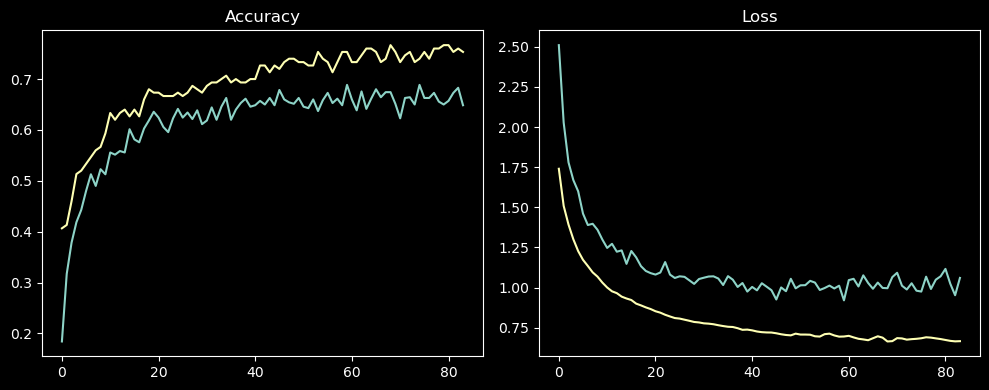

In [18]:
# Baseline MLP classifier (Keras)
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, optimizers

num_features = X_train.shape[1]
num_classes = len(le.classes_)

mlp = models.Sequential([
    layers.Input(shape=(num_features,)),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])

mlp.compile(optimizer=optimizers.Adam(learning_rate=3e-4),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

cbs = [
    callbacks.EarlyStopping(
        monitor='val_loss', patience=15, restore_best_weights=True),
    callbacks.ReduceLROnPlateau(
        monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
]

hist = mlp.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=64,
    callbacks=cbs,
    verbose=1
)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.tight_layout()
plt.show()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Test accuracy: 0.74

Classification Report:
              precision    recall  f1-score   support

       blues       0.91      0.67      0.77        15
   classical       0.88      0.93      0.90        15
     country       0.79      0.73      0.76        15
       disco       0.67      0.53      0.59        15
      hiphop       0.60      0.60      0.60        15
        jazz       0.81      0.87      0.84        15
       metal       0.81      0.87      0.84        15
         pop       0.81      0.87      0.84        15
      reggae       0.55      0.73      0.63        15
        rock       0.64      0.60      0.62        15

    accuracy                           0.74       150
   macro avg       0.75      0.74      0.74       150
weighted avg       0.75      0.74      0.74       150

Test accuracy: 0.74

Classification Report:
              precision    recall  f1-score   support

       blues       0.9

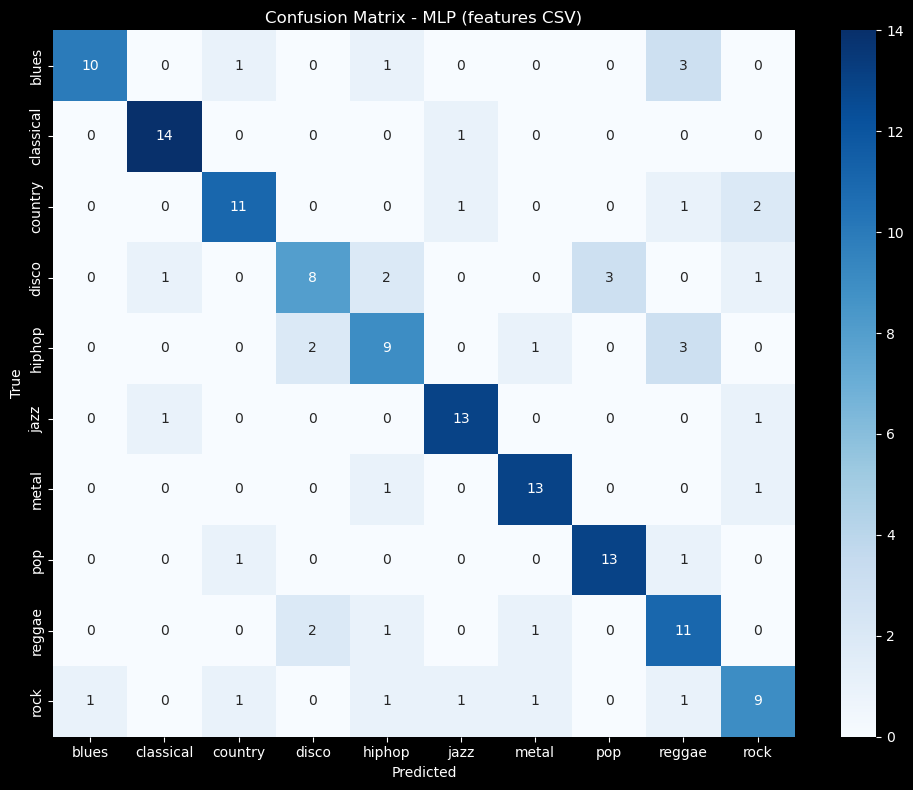

In [19]:
# Evaluate
from sklearn.metrics import accuracy_score

y_pred = mlp.predict(X_test)
y_pred_cls = np.argmax(y_pred, axis=1)

print('Test accuracy:', accuracy_score(y_test, y_pred_cls))
print('\nClassification Report:')
print(classification_report(y_test, y_pred_cls, target_names=list(le.classes_)))

cm = confusion_matrix(y_test, y_pred_cls)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - MLP (features CSV)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

In [20]:
# Save artifacts and simple inference demo
import joblib

ART_DIR = 'models'
os.makedirs(ART_DIR, exist_ok=True)

scaler_path = os.path.join(ART_DIR, 'features_scaler.joblib')
keras_file = os.path.join(ART_DIR, 'mlp_features_model.keras')
savedmodel_dir = os.path.join(ART_DIR, 'mlp_features_model_savedmodel')

joblib.dump(scaler, scaler_path)

# First try native Keras format (.keras). If that fails (e.g., environment tries HDF5),
# export a SavedModel directory either via Keras 3 `model.export()` or TF's `tf.saved_model.save`.
try:
    mlp.save(keras_file)
    print('Saved model (Keras format):', keras_file)
except Exception as e:
    print('Failed to save .keras model due to:', e)
    exported = False
    try:
        # Keras 3 export API
        if hasattr(mlp, 'export'):
            mlp.export(savedmodel_dir)
            print('Exported SavedModel (Keras export):', savedmodel_dir)
            exported = True
    except Exception as e2:
        print('Keras export failed:', e2)
    if not exported:
        try:
            import tensorflow as tf
            tf.saved_model.save(mlp, savedmodel_dir)
            print('Exported SavedModel (tf.saved_model.save):', savedmodel_dir)
            exported = True
        except Exception as e3:
            print('Also failed to export SavedModel:', e3)

print('Saved scaler:', scaler_path)

# Quick inference on a sample row using in-memory model
i = 0
x_row = X_test[i:i+1]
p = mlp.predict(x_row)[0]
print('Predicted:', le.inverse_transform([np.argmax(p)])[
      0], 'Confidence:', float(np.max(p))*100)

Failed to save .keras model due to: module 'h5py' has no attribute 'File'
INFO:tensorflow:Assets written to: models/mlp_features_model_savedmodel/assets
INFO:tensorflow:Assets written to: models/mlp_features_model_savedmodel/assets


INFO:tensorflow:Assets written to: models/mlp_features_model_savedmodel/assets


Saved artifact at 'models/mlp_features_model_savedmodel'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 57), dtype=tf.float32, name='keras_tensor_12')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  13303491648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13303480912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13303492352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13303483728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13303482848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14049481072: TensorSpec(shape=(), dtype=tf.resource, name=None)
Exported SavedModel (Keras export): models/mlp_features_model_savedmodel
Saved scaler: models/features_scaler.joblib
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted: disco Confidence: 41.76310896873474
Exported SavedModel (Keras export): models/mlp_features_model_savedmodel
Saved scaler: models/features_